In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import mglearn

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
# 차트의 한글 깨짐 방지를 위한 코드 추가

from matplotlib import font_manager, rc
import platform

# 그래프에서 한글 표기를 위한 글꼴 변경(윈도우)
font_path = ''
font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font',family = font_name)

%matplotlib inline

# 평가 지표와 측정
머신러닝의 평가 지표를 선택하기 전에 '비즈니스 지표'라고 부르는 애플리케이션의 고차원적 목표를 생각해야함<br>
ex) 교통사고를 피한다던지, 입원 환자 수를 줄인다던지, 웹사이트에 사용자를 더 유입시킨다던지<br>

모델을 선택하고 매개변수를 조정할 때, 이런 비즈니스 지표에 긍정적인 영향을 주는 모델과 매개변수를 선택해야한다.

## 이진 분류에서의 평가 지표
양성 클래스와 음성 클래스가 있으며 양성 클래스가 우리의 주 관심<br>
에러: 거짓 양성(false positive), 거짓 음성(false negative), false negative는 최대한 피해야 하는 반면 false positive는 중요도가 낮음

상업적 애플리케이션에서는 예측 오류로 인한 금전적 손해를 측정한 값을 정확도 대신 사용하기도 한다.

### 불균형 데이터셋(imbalanced datasets)
두 종류의 에러는 두 클래스 중 어느 하나가 다른 것보다 훨씬 많을 때 더 중요<br>
ex) 광고를 본후 클릭으로 연결되는 1%와 그냥 지나치는 99%가 있다 할 때 무조건 '클릭아님'으로 분류한다면 그 정확도는 99%

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
y =  (digits.target == 9)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=0)

In [5]:
from collections import Counter

In [6]:
Counter(y)
# 9와 9 아닌 것들이 1:9 비율로 나눠져 있음

Counter({False: 1617, True: 180})

In [7]:
# 다음은 항상 다수인 클래스를 예측값으로 내놓는 DummyClassifier
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
pred_most_frequent = dummy.predict(X_test)

In [8]:
print(np.unique(pred_most_frequent))

[False]


In [9]:
dummy.score(X_test,y_test)

0.8955555555555555

In [10]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
pred_tree = tree.predict(X_test)
np.unique(pred_tree)

array([False,  True])

In [11]:
tree.score(X_test,y_test)

0.9177777777777778

의사결정나무가 더미 분류기보다 조금 더 나을뿐인데 정확도가 높다고 말하기는 어렵다.

In [12]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train,y_train)
pred_dummy = dummy.predict(X_test)
print(np.unique(pred_dummy),dummy.score(X_test,y_test))

logreg = LogisticRegression(C=0.1).fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print(np.unique(pred_logreg),logreg.score(X_test,y_test))

[False  True] 0.8155555555555556
[False  True] 0.9844444444444445


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


pred_most_frequent나 pred_dummy처럼, 빈도나 무작위 기반 예측보다 얼마나 더 나은지 알려주는 평가 지표가 필요<br>
모델을 평가하는 지표라면 이런 비상식적인 예측은 피할 수 있어야한다.

### 오차 행렬(confusion matrix)

In [13]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test,pred_logreg)

In [14]:
confusion

array([[402,   1],
       [  6,  41]], dtype=int64)

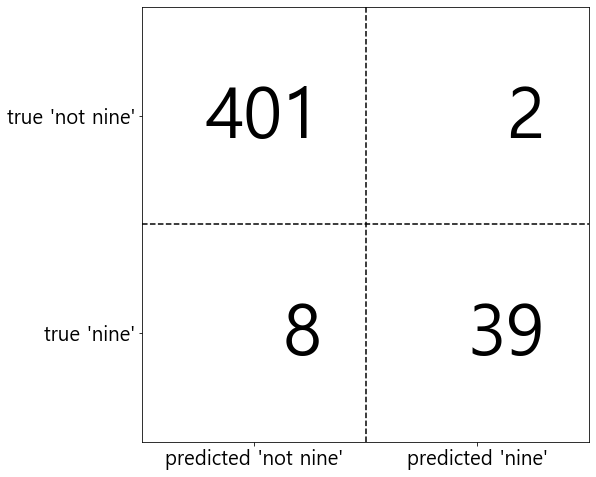

In [15]:
mglearn.plots.plot_confusion_matrix_illustration()

오차 행렬의 대각 성분은 정확히 분류된 경우, 다른 항목은 한 클래스의 샘플들이 다른 클래스로 잘못 분류된 경우가 얼마나 많은지 알려준다.

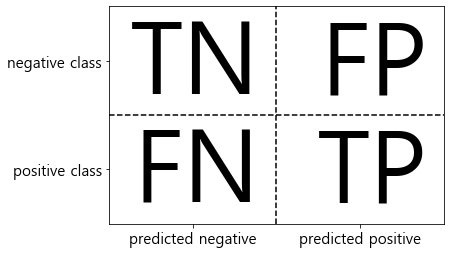

In [16]:
# False positive,negative and True positive,negative
mglearn.plots.plot_binary_confusion_matrix()

In [17]:
print("빈도 기반 더미 모델 : \n",confusion_matrix(y_test,pred_most_frequent))
print("\n무작위 더미 모델 : \n",confusion_matrix(y_test,pred_dummy))
print('\n결정 트리 : \n',confusion_matrix(y_test,pred_tree))
print('\n로지스틱 회귀 : \n',confusion_matrix(y_test,pred_logreg))

빈도 기반 더미 모델 : 
 [[403   0]
 [ 47   0]]

무작위 더미 모델 : 
 [[362  41]
 [ 41   6]]

결정 트리 : 
 [[390  13]
 [ 24  23]]

로지스틱 회귀 : 
 [[402   1]
 [  6  41]]


### 정확도와의 관계
정확도 = $(TP+TN)\over(TP+TN+FP+FN)$

### 정밀도, 재현율, f-점수
:오차 행렬의 결과를 요약하는 여러 방법들

정밀도(precision,PPV) = $TP\over TP+FP$
- 거짓 양성(FP)의 수를 줄이는 것이 목표일 때
- 예를 들어 임상 실험의 비용을 아끼기 위해 단 한 번의 실험으로 신약 효과를 검증하기 원할 때 

재현율(recall) = $TP \over TP+FN$ = 민감도(sensitivity), 적중률(hit rate), 진짜 양성 비율(TPR)
- 모든 양성 샘플을 식별해야할 때의 성능 지표. 거짓 음성(FN)을 피하는 것이 목표
- 예를 들어 암 진단 시 건강한 사람이 일부 포함되더라도 암에 걸린 사람을 빠짐없이 찾아내는 것이 중요

재현율 최적화와 정밀도 최적화는 상충

둘 중 하나만으로는 전체 그림을 볼 수 없기 때문에 정밀도와 재현율의 조화평균인 f-점수(f-score) 혹은 f-측정(f-measure)을 사용하기도 한다.<br>
F= 2x$정밀도*재현율 \over 정밀도+재현율$ : f1-점수

In [18]:
# 9와 9 아님 데이터셋에 적용
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델 : ",f1_score(y_test,pred_most_frequent))
print("\n무작위 더미 모델 : ",f1_score(y_test,pred_dummy))
print("\n트리 모델 : ",f1_score(y_test,pred_tree))
print("\n로지스틱 회귀 모델 : ",f1_score(y_test,pred_logreg))

빈도 기반 더미 모델 :  0.0

무작위 더미 모델 :  0.1276595744680851

트리 모델 :  0.5542168674698795

로지스틱 회귀 모델 :  0.9213483146067415


빈도 기반 더미 모델은 양성 클래스가 하나도 없어 정밀도의 분모가 0이므로 에러 메세지를 내뱉음<br>
f1-점수는 어떤 모델이 더 좋은지 판단하는데 좋은 기준이 되지만 정확도보다 이해하거나 설명하는 것이 어렵다는 단점이 있음

classification_report 함수는 정밀도, 재현율, f1-점수를 모두 한번에 계산해 깔끔하게 출력해준다.

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_most_frequent,
                     target_names=['9 아님','9']))  # 양성클래스를 둘 중 무엇으로 두느냐 설정

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


마지막 세줄은 평균을 보여줌. macro avg는 단순히 클래스별 점수의 평균을 계산한 것, weighted avg는 클래스의 샘플 수로 가중 평균한 것<br>
양성 클래스의 정밀도나 재현율 점수만 보는 것에 비해 두 클래스를 평균하면 숫자 하나로 된 의미 있는 지표를 얻을 수 있다.

In [20]:
print(classification_report(y_test,pred_dummy,
                     target_names=['9 아님','9']))
print(classification_report(y_test,pred_tree,
                     target_names=['9 아님','9']))
print(classification_report(y_test,pred_logreg,
                     target_names=['9 아님','9'])) 

              precision    recall  f1-score   support

        9 아님       0.90      0.90      0.90       403
           9       0.13      0.13      0.13        47

    accuracy                           0.82       450
   macro avg       0.51      0.51      0.51       450
weighted avg       0.82      0.82      0.82       450

              precision    recall  f1-score   support

        9 아님       0.94      0.97      0.95       403
           9       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450

              precision    recall  f1-score   support

        9 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



## 불확실성 고려
예측값은 모델에 담긴 정보가 이미 많이 손실된 상태임. 대부분의 분류기는 예측의 확신을 가다듬기 위해 decision_function이나 predict_proba_ 메서드를 제공한다. 예측을 만들어내는 것은 해당 메서드들의 출력의 임계값을 검증하는 것이다. 이진 탐색에서 decision_function은 0, predict_proba는 0.5를 임계값으로 사용한다.

In [21]:
# 음성 클래스 400개, 양성 클래스 50개로 이루어진 불균형한 이진 분류 문제

from sklearn.datasets import make_blobs
from sklearn.svm import SVC
X,y = make_blobs(n_samples=(400,50),cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)
svc = SVC(gamma = .05).fit(X_train,y_train)

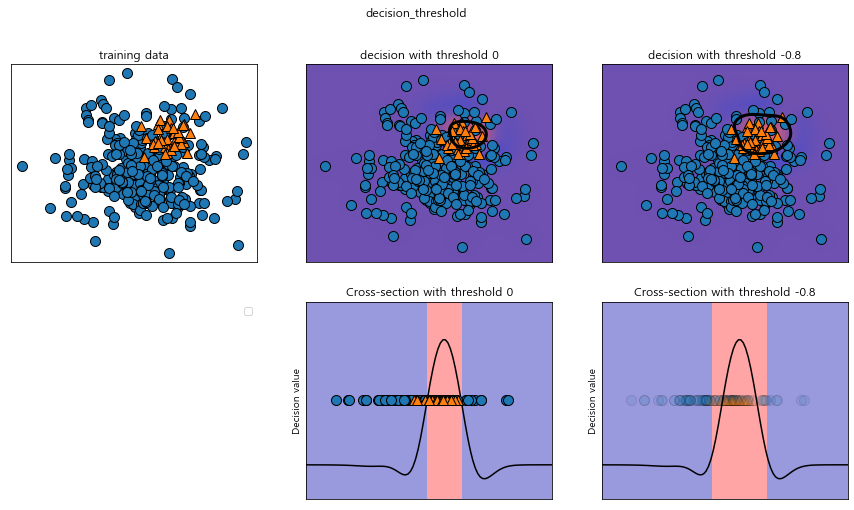

In [22]:
mglearn.plots.plot_decision_threshold()

In [23]:
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



클래스 1의 재현율을 높이는 것이 중요하다 할 때 FP가 늘어나더라도 TP를 늘려야한다.<br>
svc.predict로 만든 이 예측은 조건을 만족시키지 못하지만, 임계값을 바꿔 클래스 1의 재현율을 높이도록 예측을 조정할 수 있다.

In [24]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [25]:
print(classification_report(y_test,y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



더 넓은 영역이 클래스 1로 분류되는 것을 위의 그림을 통해 확인할 수 있다.<br>
재현율보다 정밀도가 중요하거나 그 반대일 때, 또는 데이터가 심하게 불균형일 때 결정함수의 임계값을 바꾸면 더 나은 결과를 얻을 수 있다.<br>
decision_function은 임의의 범위를 가지고 있으므로 임계점을 고르는 일반적인 방법을 제시하기는 어렵다. 임계값을 선택할 때 테스트 세트를 사용하지 않도록 주의해야한다. 다른 하이파라미터와 마찬가지로 임계값 설정에 테스트 세트를 사용하면 과도하게 낙관적인 결과를 얻을 수도 있다. 대신 검증 세트나 교차 검증을 사용해야한다.(위의 예에서는 예시를 위해 테스트 세트를 사용한 것임)

pred_proba 메서드는 출력이 0에서 1 사이로 고정되니 임계값을 선택하기가 더욱 쉽다. 임계값을 높이려면 양성클래스로 분류할 때 0.5보다 더 큰 확신이 있어야한다. 다만 모든 모델이 쓸모 있는 불확실성을 제공하는 것은 아니다. 과대적합된 모델은 잘못된 예측일지라도 100% 가깝게 확신한다.

이는 보정(calibration) 개념과 관계있다.

## 정밀도- 재현율 곡선
모델의 분류작업을 결정하는 임계값을 바꾸는 것은 해당 분류기의 정밀도와 재현율의 상충관계를 조정하는 일이다. 이런 결정은 비즈니스 목표에 따라 결정된다. 90% 재현율과 같은 특정 목적을 충족하는 임계값을 찾는 것은 언제든 가능하지만 이 임계값을 유지하면서 적절한 정밀도를 내는 모델을 만드는 일은 쉽지 않을 수 있다. 만약 모든 것을 양성이라고 분류한다면 재현율이 100%가 되겠지만 이런 모델은 쓸모가 없다.

90% 재현율처럼 분류기의 필요조건을 지정하는 것을 운영 포인트(operating point)를 지정한다고 한다. 운영 포인트를 고정하면 비즈니스 목표를 설정할 때 고객이나 조직 내 다른 그룹에 성능을 보장하는데 도움이 된다.

새로운 모델을 만들 때 운영 포인트가 명확하지 않은 경우가 많다. 이런 경우 문제를 더 잘 이해하기 위해 모든 임계값을 조사하거나, 한 번에 정밀도나 재현율의 모든 장단점을 살펴보는 것이 좋다. 이를 위해 정밀도-재현율 곡선(precision-recall curve)을 사용한다.

In [29]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds = precision_recall_curve(y_test,svc.decision_function(X_test))

해당 함수는 가능한 모든 임계값(결정 함수에 나타난 모든 값)에 대해 정밀도와 재현율의 값을 정렬된 리스트로 반환하므로 곡선 그래프를 그릴 수 있다.

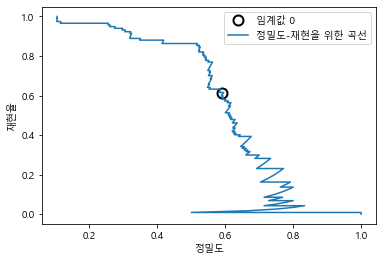

In [30]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘린다.
X,y = make_blobs(n_samples=(4000,500),cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test = train_test_split(X,y)

svc = SVC(gamma=0.05).fit(X_train,y_train)

precision,recall,thresholds = precision_recall_curve(y_test,svc.decision_function(X_test))

# 0에 가까운 임계값을 찾는다.
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label='임계값 0',fillstyle='none',c='k',mew=2)
plt.plot(precision,recall,label='정밀도-재현을 위한 곡선')
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc='best')

곡선이 오른쪽 위로 갈수록 더 좋은 분류기이다.

분류기가 다르면 곡선의 다른 부분에서 장점이 생긴다. 즉 운영포인트가 달라진다.

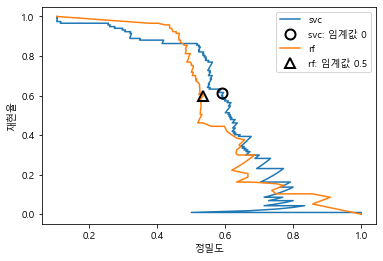

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=0,max_features=2)
rf.fit(X_train,y_train)

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공한다.
precision_rf, recall_rf,thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(precision,recall,label='svc')
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label='svc: 임계값 0',fillstyle='none',c='k',mew=2)

plt.plot(precision_rf,recall_rf,label='rf')

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5)) # 0.5에 제일 가까운 인덱스
plt.plot(precision_rf[close_default_rf],recall_rf[close_default_rf],'^',
         c='k',markersize=10,label='rf: 임계값 0.5',fillstyle='none',mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc='best')

f1-점수는 정밀도-재현율 곡선의 한 지점인 기본 임계값에 대한 점수로서 f1-점수만으로 전체 성능을 비교하면 세세한 부분을 놓치기 쉽다. 가령 재현울이 매두 높을 때에는 랜덤포레스트가 더 낫다.

In [32]:
print("랜덤포레스트의 f1점수: {:.3f} ".format(f1_score(y_test,rf.predict(X_test))))
print("svc의 f1점수: {:.3f}".format(f1_score(y_test,svc.predict(X_test))))

랜덤포레스트의 f1점수: 0.553 
svc의 f1점수: 0.603


정밀도-재현율을 비교하면 많은 통찰을 얻을 수 있지만 많은 수작업이 따른다. <br>
모델을 자동으로 비교하려면 특정 임계값이나 운영포인트에 국한하지 않고 전체 곡성에 담긴 정보를 요약해야한다. 이러한 요약 방법의 하나로 정밀도-재현율 곡선의 아랫부분 면적을 계산할 수 있으며, 이를 평균 정밀도(average precision)이라고 한다.

정밀도-재현율 곡선을 계산하고 여러 임계값을 고려해야하므로, predict함수가 아니라 decision_function이나 predict_proba 함수의 결과값을 average_precision_score 함수로 전달해야한다.

In [33]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test,rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test,svc.decision_function(X_test))

print("rf의 평균정밀도 : ",ap_rf)
print("svc의 평균정밀도 : ",ap_svc)

rf의 평균정밀도 :  0.580916535576859
svc의 평균정밀도 :  0.5990171910532722


## ROC와 AUC
ROC 곡선은 여러 임계값에서 분류기의 특성을 분석하는데 널리 사용하는 도구이다. 정밀도와 재현율 대신 진짜 양성 비율(TPR)에 대한 거짓 양성 비율(FPR)을 나타낸다. 진짜 양성 비율은 재현율의 다른 이름이며, 거짓 양성 비율은 다음과 같다.<br>
FPR = $FP \over FP+TN$<br>

TPR은 양성 중에 제대로 된(양성) 판정 비율, FPR은 음성중에 잘못된(양성) 판정 비율이다.
sklearn의 roc_curve 함수를 이용하여 만든다.

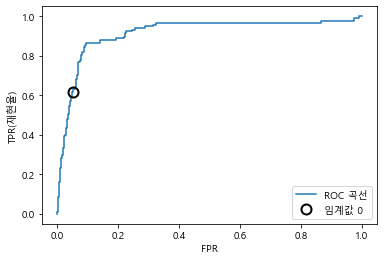

In [34]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,svc.decision_function(X_test))

plt.plot(fpr,tpr,label='ROC 곡선')
plt.xlabel("FPR")
plt.ylabel("TPR(재현율)")

# 0근처의 임계값을 찾는다.
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,label='임계값 0',fillstyle = 'none',c='k',mew=2)
plt.legend(loc='best')

ROC 곡선은 왼쪽 위에 가까울 수록 이상적이다. 임계값 0지점에 비해 FPR을 조금 늘리면 재현율을 아주 크게 높일 수 있다.<br>
마찬가지로 임계값을 고르기 위해 테스트 세트를 사용해서는 안 되고 별도의 검증 세트를 이용해야한다.

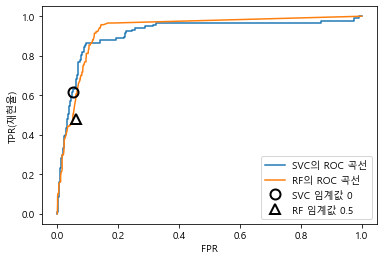

In [35]:
fpr_rf,tpr_rf,thresholds_rf = roc_curve(y_test,rf.predict_proba(X_test)[:,1])

plt.plot(fpr,tpr,label='SVC의 ROC 곡선')
plt.plot(fpr_rf,tpr_rf,label='RF의 ROC 곡선')

plt.xlabel("FPR")
plt.ylabel("TPR(재현율)")
plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,label='SVC 임계값 0',c='k',mew=2,fillstyle='none')

close_default_rf = np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(fpr_rf[close_default_rf],tpr[close_default_rf],'^',markersize=10,label='RF 임계값 0.5',c='k',mew=2,fillstyle='none')
plt.legend(loc=4)

정밀도-재현율 곡선처럼 ROC 곡선 역시 아래의 면적값 하나로 곡선을 요약할 때가 많다.이 면적을 AUC(area under the curve)라고 한다.<br> roc_auc_score 함수로 계산한다.

In [36]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test,svc.decision_function(X_test))
print('RF의 AUC : ',rf_auc)
print('SVC의 AUC : ',svc_auc)

RF의 AUC :  0.9298729819563153
SVC의 AUC :  0.9138770180436847


랜덤 포레스트의 성능이 SVM보다 조금 더 낫다. 데이터셋에 담긴 클래스가 아무리 불균형하더라도 무작위로 예측한 AUC 값은 0.5가 된다.그래서 불균형한 데이터셋에서는 정확도보다 AUC가 더 좋은 지표가 된다. 

AUC는 양성 샘플의 순위를 평가하는 것으로 볼 수도 있다. 이는 분류기에서 무작위로 선택한 양성 클래스 포인트의 점수가 무작위로 선택한 음성 클래스 포인트의 점수보다 높을 확률과 같다. 그래서 AUC가 1일 때는 모든 양성 포인트의 점수가 모든 음성 포인트의 점수보다 높다.

In [37]:
y = (digits.target == 9)

gamma = 1.00 정확도 = 0.90 AUC = 0.50
gamma = 0.10 정확도 = 0.90 AUC = 0.96
gamma = 0.01 정확도 = 0.90 AUC = 1.00


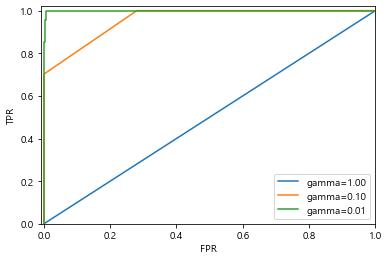

In [40]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state = 0)

plt.figure()

for gamma in [1,0.1,0.01]:
    svc = SVC(gamma=gamma).fit(X_train,y_train)
    accuracy = svc.score(X_test,y_test)
    auc = roc_auc_score(y_test,svc.decision_function(X_test))
    fpr,tpr,_ = roc_curve(y_test,svc.decision_function(X_test))
    print('gamma = {:.2f} 정확도 = {:.2f} AUC = {:.2f}'.format(gamma,accuracy,auc))
    plt.plot(fpr,tpr,label='gamma={:.2f}'.format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-.01,1)
plt.ylim(0,1.02)
plt.legend(loc='best')

gamma=1에서 AUC는 무작위로 선택한 수준.<br>
결정 함수에서 모든 양성포인트는 어떤 음성포인트보다 높은 점수를 얻는다.<br>
적절한 임계값에서 이 모델은 데이터를 완벽하게 분류할 수 있는데 정확도만 사용한다면 이런 점을 결코 발견할 수 없다.

이런 이유로 불균형한 데이터셋에서는 모델을 평가할 때 AUC를 사용하는 것이 좋다. 다만 AUC가 높은 모델에서 좋은 분류결과를 얻으려면 결정 임계값을 조정해야한다,

# 다중 분류의 평가 지표

In [41]:
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,random_state=0)
lr = LogisticRegression(solver='liblinear',multi_class='ovr').fit(X_train,y_train)
pred = lr.predict(X_test)

print("정확도 : {:.3f}".format(accuracy_score(y_test,pred)))
print("오차 행렬 : \n",confusion_matrix(y_test,pred))

정확도 : 0.953
오차 행렬 : 
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


In [42]:
import seaborn as sns

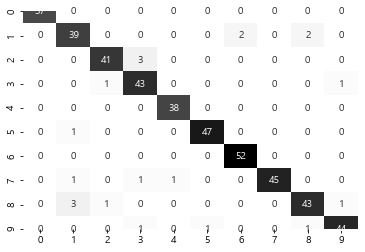

In [46]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap=plt.cm.gray_r,
            xticklabels=digits.target_names,yticklabels=digits.target_names,cbar=False)

In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



다중 분류에서 불균형 데이터셋을 위해 가장 널리 사용하는 평가지표는 f1-점수의 다중 분류 버전이다. 한 클래스를 양성으로 두고, 나머지 클래스들을 음성 클래스로 간주하여 클래스마다 f1-점수를 계산한다. 그런 다음, 클래스별 f1-점수를 다음 전략 중 하나를 사용하여 평균을 낸다.

- macro 평균은 클래스별 f1-점수에 가중치를 주지 않는다. 클래스 크기에 상관없이 모든 클래스를 같은 비중으로 다룬다.
- weighted 평균은 클래스별 샘플 수로 가중치를 두러 f1-점수의 평균을 계산한다,
- micro 평균은 모든 클래스의 FP,FN,TP의 총 수를 헤아린 다음 정밀도,재현율,f1-점수를 이 수치로 계산한다.

각 샘플을 똑같이 간주한다면 micro 평균 f1-점수를, 각 클래스를 동일한 비중으로 고려한다면 macro 평균 f1-점수를 계산할 것

In [49]:
print(f1_score(y_test,pred,average='micro'))
print(f1_score(y_test,pred,average='macro'))

0.9533333333333334
0.9539995483362096


# 회귀의 평가 지표
회귀 평가는 분류에서와 비슷하게 할 수 있다. 예를 들어 타깃을 과대 예측한 것 대비 과소 예측한 것을 분석한다.<br>
그러나 대부분의 애플리케이션에서는 회귀 추정기의 score 메서드에서 사용하는 $R^2$만으로 충분

# 모델 선택에서 평가 지표 사용하기
그리드 서치나 cross_val_score을 사용하여 모델을 선택할 때, AUC 같은 평가 지표를 사용하고 싶은 경우가 있다.<br>
sklearn에서는 GridSearchCV와 cross_val_score의 scoring 매개변수를 통해 손쉽게 이를 구현할 수 있다.dd

기본값에서 평균 정밀도로 바꾸기 위해서는 scoring 매개벼나수에 average_precision이라고 지정하면 된다.

In [58]:
from sklearn.model_selection import cross_val_score,cross_validate

In [53]:
# 분류의 기본 평가 지표는 정확도
print("기본 평가 지표: ",cross_val_score(SVC(),digits.data,digits.target == 9,cv=5))

# scoring=accuracy의 결과
explicit_accuracy = cross_val_score(SVC(),digits.data,digits.target == 9,scoring = 'accuracy',cv=5)
print("정확도 평가 지표 : ",explicit_accuracy)

roc_auc = cross_val_score(SVC(),digits.data,digits.target==9,scoring='roc_auc',cv=5)
print("평균 정밀도 지표 : ",roc_auc)

기본 평가 지표:  [0.975      0.99166667 1.         0.99442897 0.98050139]
정확도 평가 지표 :  [0.975      0.99166667 1.         0.99442897 0.98050139]
평균 정밀도 지표 :  [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [57]:
roc_auc = cross_val_score(SVC(),digits.data,digits.target==9,scoring='average_precision',cv=5)
print(roc_auc)

[0.97562403 0.9886322  1.         0.99853801 0.95015534]


In [61]:
# cross_validate 함수를 사용하면 한 번에 여러 측정 지표를 계산할 수 있다.

res = cross_validate(SVC(),digits.data,digits.target == 9,scoring=['accuracy','roc_auc','recall_macro'],
                    return_train_score=True,cv=5)
pd.DataFrame(res)

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.010703,0.021959,0.975000,0.994433,0.997171,0.998679,0.887346,0.972222
1,0.021999,0.010001,0.991667,0.995825,0.998543,0.999141,0.958333,0.982252
2,0.022000,0.009000,1.000000,0.995132,1.000000,0.998975,1.000000,0.978780
3,0.023003,0.011505,0.994429,0.995828,0.999828,0.998825,0.972222,0.982252
4,0.025000,0.012000,0.980501,0.996523,0.984004,0.999914,0.902778,0.985725


In [66]:
# 그리드 서치에서 최적의 매개 변수를 선택하기 위해 평가 지표를 바꿀 수도 있다.

X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target==9,random_state = 0)

# 일부러 적절하지 않은 그리드를 만든다.
param_grid = {'gamma':[0.0001,0.01,0.1,1,10]}
# 기본 정확도 측정 지표를 사용한다.
grid = GridSearchCV(SVC(),param_grid=param_grid,cv=3)
grid.fit(X_test,y_test)
print("정확도 지표를 사용한 그리드 서치\n최적의 파라미터: ",grid.best_params_)
print("최상의 교차검증 점수(정확도): ",grid.best_score_)
print("테스트 세트의 평균 정밀도: ",average_precision_score(y_test,grid.decision_function(X_test)))
print("테스트 세트 정확도: ",grid.score(X_test,y_test))

정확도 지표를 사용한 그리드 서치
최적의 파라미터:  {'gamma': 0.0001}
최상의 교차검증 점수(정확도):  0.8977777777777778
테스트 세트의 평균 정밀도:  0.9453717705587078
테스트 세트 정확도:  0.9422222222222222


In [67]:
# 평균 정밀도 지표 사용
grid = GridSearchCV(SVC(),param_grid=param_grid,scoring='average_precision',cv=3)
grid.fit(X_train,y_train)
print("AUC 지표를 사용한 그리드 서치\n최적의 파라미터: ",grid.best_params_)
print("최상의 교차검증 점수(정밀도): ",grid.best_score_)
print("테스트 세트의 평균 정밀도: ",average_precision_score(y_test,grid.decision_function(X_test)))
print("테스트 세트 정확도: ",grid.score(X_test,y_test))

AUC 지표를 사용한 그리드 서치
최적의 파라미터:  {'gamma': 0.01}
최상의 교차검증 점수(정밀도):  0.9848054272142445
테스트 세트의 평균 정밀도:  0.9958247456096899
테스트 세트 정확도:  0.9958247456096899


In [69]:
# 다음과 같은 평가 방식들이 있다.
from sklearn.metrics.scorer import SCORERS

In [71]:
print(sorted(SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']
